# Group 12 - Google Playstore Apps Business Analytics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing

### #Data Collection

In [2]:
#reading the dataset
df = pd.read_csv('googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


We have a dataset of 10840 apps in the google playstore and their statistics.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### #Pre-Processing

In [4]:
#Converting object dtypes to numerical values
df['Price'] = df['Price'].str.replace('[$, Everyone]', '0', regex = True)
df['Price'] = df['Price'].astype(float)

df['Installs'] = df['Installs'].str.replace('+', '', regex = True)
df['Installs'] = df['Installs'].str.replace(',', '', regex = True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

df['Size'] = df['Size'].str.replace('M', '', regex = True)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [5]:
#Finding Null values in each column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              1
Size              2012
Installs             1
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
#Filling null values
df['Rating'] = df['Rating'].fillna(2)

df['Size'] = df['Size'].fillna(df['Size'].median())

df['Reviews'] = df['Reviews'].fillna(df['Reviews'].median())

df['Installs'] = df['Installs'].fillna(df['Installs'].median())

df['Type'] = df['Type'].fillna(df['Type'].mode()[0])

df['Content Rating'] = df['Content Rating'].fillna(df['Content Rating'].mode()[0])

In [7]:
#label encoding of 'Genres'
from sklearn.preprocessing import LabelEncoder
a = ['Genres']
for i in np.arange(len(a)):
    df[a[i]] =LabelEncoder().fit_transform(df[a[i]])

In [8]:
#label encoding of 'Category'
a = ['Category']
for i in np.arange(len(a)):
    df[a[i]] =LabelEncoder().fit_transform(df[a[i]])

In [9]:
#label encoding of 'Content Rating'
a = ['Content Rating']
for i in np.arange(len(a)):
    df[a[i]] =LabelEncoder().fit_transform(df[a[i]])

In [10]:
#one-hot encoding of 'Type'
df = pd.get_dummies(df, columns =['Type'])
df = df.drop(['Type_0'], axis =1)
df = df.drop(['Current Ver','Android Ver'], axis =1)

#Processed Dataset
df

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Type_Free,Type_Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,1,4.1,159.0,19.0,10000.0,0.0,1,9,"January 7, 2018",1,0
1,Coloring book moana,1,3.9,967.0,14.0,500000.0,0.0,1,12,"January 15, 2018",1,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1,4.7,87510.0,8.7,5000000.0,0.0,1,9,"August 1, 2018",1,0
3,Sketch - Draw & Paint,1,4.5,215644.0,25.0,50000000.0,0.0,4,9,"June 8, 2018",1,0
4,Pixel Draw - Number Art Coloring Book,1,4.3,967.0,2.8,100000.0,0.0,1,11,"June 20, 2018",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,12,4.5,38.0,53.0,5000.0,0.0,1,39,"July 25, 2017",1,0
10837,Fr. Mike Schmitz Audio Teachings,12,5.0,4.0,3.6,100.0,0.0,1,39,"July 6, 2018",1,0
10838,Parkinson Exercices FR,21,2.0,3.0,9.5,1000.0,0.0,1,72,"January 20, 2017",1,0
10839,The SCP Foundation DB fr nn5n,4,4.5,114.0,14.0,1000.0,0.0,3,19,"January 19, 2015",1,0


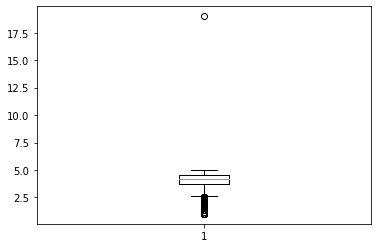

In [11]:
#Detecting Outliers in Rating Column
plt.boxplot(df['Rating'])
plt.show()

In [12]:
#Removing Outliers
ulim = 5
llim = 1
outlier = []
for x in (df['Rating']):
    if(x>ulim or x<llim):
        outlier.append(x)
ind2 = df['Rating']>ulim 
df.loc[ind2].index
df.drop([10472],inplace=True)

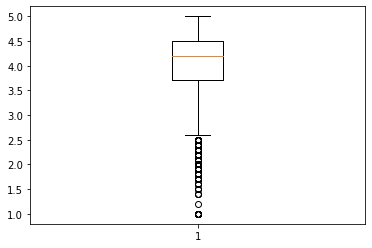

In [13]:
plt.boxplot(df['Rating'])
plt.show()

Negative outliers are not removed since the ratings are considered between 1-5 and is an important part in deciding the perfomance of an app.

### #Exploratory Data Analysis

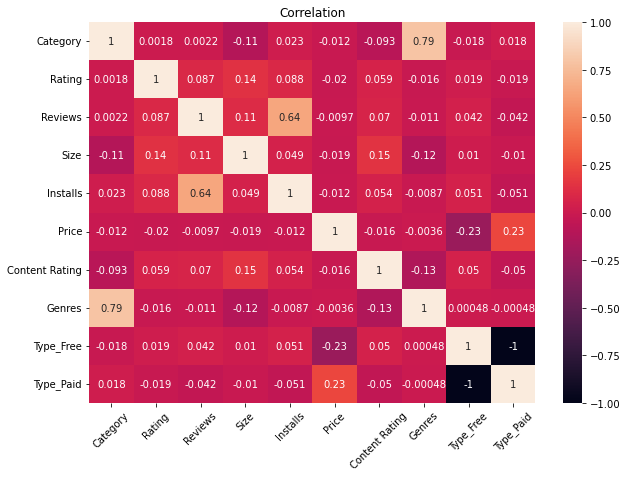

In [14]:
#Heatmap displaying correlation between features.
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.xticks(rotation=45)
plt.title('Correlation')
plt.show()

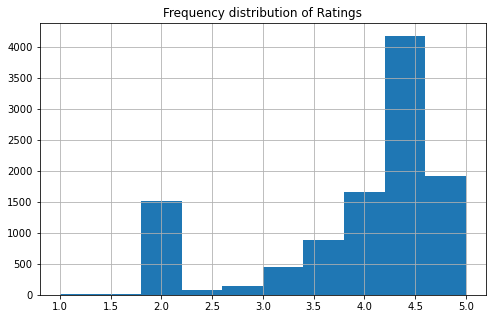

In [15]:
#Histogram displaying the frequency of Ratings.
frequency = df['Rating']
frequency.hist(figsize=(8,5))
plt.title('Frequency distribution of Ratings')
plt.show()

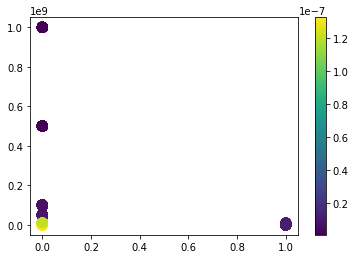

In [16]:
#Scaled density scatterplot displaying the difference between paid and unpaid apps
from scipy.stats import gaussian_kde
x = df['Type_Paid']
y = df['Installs']
xy = np.stack([x,y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
ax.scatter(x, y, c = z, s = 100)
fig.colorbar(ax.scatter(x, y, c = z, s = 100))
plt.show()

We can clearly see that paid apps generally tend to have lesser popularity than free apps.

In [17]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Type_Free,Type_Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,1,4.1,159.0,19.0,10000.0,0.0,1,9,"January 7, 2018",1,0
1,Coloring book moana,1,3.9,967.0,14.0,500000.0,0.0,1,12,"January 15, 2018",1,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1,4.7,87510.0,8.7,5000000.0,0.0,1,9,"August 1, 2018",1,0
3,Sketch - Draw & Paint,1,4.5,215644.0,25.0,50000000.0,0.0,4,9,"June 8, 2018",1,0
4,Pixel Draw - Number Art Coloring Book,1,4.3,967.0,2.8,100000.0,0.0,1,11,"June 20, 2018",1,0


### Modelling

In [18]:
y = df['Installs']
X = df.drop(['Installs', 'App', 'Last Updated'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [19]:
# importing linear regressor
from sklearn.linear_model import LinearRegression
# Instantiating linear regressor
lm=LinearRegression()
# Fitting the model
lm.fit(X_train,y_train)
# making predictions on the test set
predictions=lm.predict(X_test)
# Accuracy score for Linear regressor
linearregressionscore=lm.score(X_test,y_test)
linearregressionscore

0.4979291471794839

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

3321996991472648.0

In [21]:
# Importing the regressor
from sklearn.tree import DecisionTreeRegressor
# Instantiating the regressor
decisiontreereg=DecisionTreeRegressor()
# Fitting the model
decisiontreereg.fit(X_train,y_train)
# Gettting the predicted values
y_prediction=decisiontreereg.predict(X_test)
# The accuracy score for decision tree regressor
decisiontreescore=decisiontreereg.score(X_test,y_test)
decisiontreescore

0.7608184869662548

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_prediction)

1582566010853497.5

In [23]:
# Importing the random forest regressor
from sklearn.ensemble import RandomForestRegressor
# Instantiating with giving the value of number of sub trees to be created.
Randomforestreg=RandomForestRegressor(n_estimators = 100,n_jobs = -1,oob_score = True, bootstrap = True,random_state=42)
# fitting the model
Randomforestreg.fit(X_train,y_train)
# Predicting the number of installs
y_prediction_randomforest=Randomforestreg.predict(X_test)
# Accuracy score for random forest
randomforestscore=Randomforestreg.score(X_test,y_test)
randomforestscore

0.8898755828405793

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_prediction_randomforest)

728648118957933.0

### Final Analysis:

We have analysed the play store app data consisting of 10k+ app data and tried to build a model that can predict the success of a new app based on parameters such as reviews, rating, size of app, genre, category and price. We use the parameters to predict an approximate rate of installs for an app that determines the popularity and success of the app in the google playstore.
We obtained a maximum accuracy score of 0.88 using random forest regressor algorithm that is, we can determine upto 88% weather a new app will be successful. 